In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from mlhandmade.plotting import(
    scatter_plot,
    plot_decision_regions
)
# fix plot_confusion_matrix import
from mlhandmade.plotting.confusion_matrix import plot_confusion_matrix
from mlhandmade.model_selection import(
    confusion_matrix,
    accuracy_score,
)
from mlhandmade.preprocessing import(
    standardize,
    ordinal,
)
from mlhandmade.linear_models import SoftmaxRegressor

In [2]:
iris = pd.read_csv("../datasets/iris.csv")
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


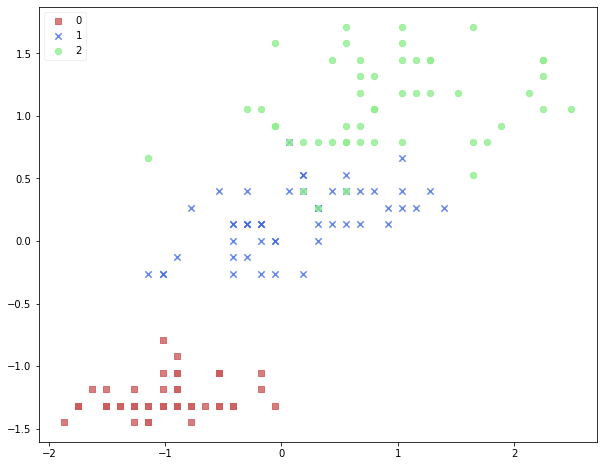

In [3]:
X = iris.iloc[:, [0, 3]].values
y = iris.iloc[:, -1].values

X = standardize(X)
y = ordinal(y)
fig = plt.figure(figsize=(10,8))
ax = scatter_plot(X, y, legend=2)

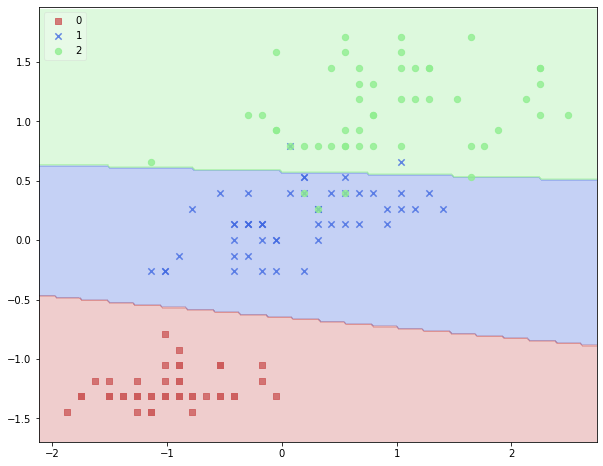

In [4]:
model = SoftmaxRegressor(eta=0.1, epochs=400)
model.fit(X, y)

fig = plt.figure(figsize=(10,8))
ax = plot_decision_regions(X, y, model, legend=2)

In [5]:
y_pred = model.predict(X)
acc = accuracy_score(y, y_pred, normalize=True)
cm = confusion_matrix(y, y_pred, normalize="pred")
print(f"Accuracy: {acc}")
print(f"Confusion matrix:\n{cm}")

Accuracy: 0.96
Confusion matrix:
[[1.         0.         0.        ]
 [0.         0.92307692 0.04166667]
 [0.         0.07692308 0.95833333]]


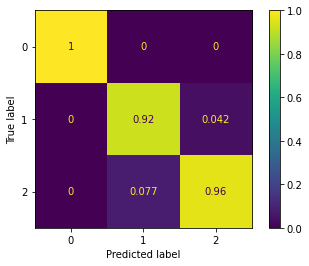

In [6]:
ax = plot_confusion_matrix(y, y_pred, normalize="pred")